# <center>Predicting Term Deposit subscribtion by a client</center>

## Problem Statement:
The objective of the dataset is to predict whether or not a client will subscribe to the term deposit.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age, job, marital status, and so on.

## Data Definition:
Input variables:

1) age (numeric)

2) job: type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3) marital:    marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) education: (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')

5) default: has credit in default? (categorical: 'no','yes','unknown')

6) housing: has housing loan? (categorical: 'no','yes','unknown')

7) loan: has personal loan? (categorical: 'no','yes','unknown')

8) contact: contact communication type (categorical: 'cellular','telephone')

9) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10) day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric)

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) euribor3m: euribor 3 month rate - daily indicator (numeric)

20) nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21) y - has the client subscribed a term deposit? (binary: 'yes','no')

## Content
Import Packages

Read Data
Understand and Prepare the Data

3.1 - Data Types and Dimensions
3.2 - Statistical Summary
3.3 - Label Encoding for Target Variable
3.4 - One Hot Encoding for Categorical Variables
3.5 - Missing Data Treatment
3.6 - Correlation

Support Vector Machine
4.1 - Support Vector Machine using Linear Kernal
4.2 - Support Vector Machine using Gaussian Kernal
4.3 - Support Vector Machine using Sigmoid Kernal
4.4 - Support Vector Machine using Polynomial Kernal
4.5 - Support Vector Machine using Polynomial Kernal with degree of polynomial = 2
4.6 - Support Vector Machine using Polynomial Kernal using GridSearchCV

## Import Package

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,roc_curve
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

plt.rcParams["figure.figsize"]= [15,8]

## set options

In [23]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.6f' % x)

## Read Data

In [24]:
data = pd.read_csv(r"D:\Imarticus\ML\Supervised learning\8-SVM support vector machine\bank-additional-full.csv",sep = ";")

In [25]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


## Understand the Data and Prepare the Data

The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

Here we will analyze and prepare data to perform regression techniques:
1. Check dimensions and data types of the dataframe
2. Study summary statistics
3. Check for missing values
4. Study correlation

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [27]:
data.shape

(41188, 21)

## Checking the Frequancy of Target Variable

In [28]:
print("Number of Observation:",data.shape[0])
print("Number of people opted for Term Deposit:",data[data.y == "yes"].shape[0])
print("Number of people not opted for Term Deposit:",data[data.y == "no"].shape[0])

Number of Observation: 41188
Number of people opted for Term Deposit: 4640
Number of people not opted for Term Deposit: 36548


## statistical summary

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.000000,40.024060,10.421250,17.000000,32.000000,38.000000,47.000000,98.000000
duration,41188.000000,258.285010,259.279249,0.000000,102.000000,180.000000,319.000000,4918.000000
campaign,41188.000000,2.567593,2.770014,1.000000,1.000000,2.000000,3.000000,56.000000
pdays,41188.000000,962.475454,186.910907,0.000000,999.000000,999.000000,999.000000,999.000000
previous,41188.000000,0.172963,0.494901,0.000000,0.000000,0.000000,0.000000,7.000000
emp.var.rate,41188.000000,0.081886,1.570960,-3.400000,-1.800000,1.100000,1.400000,1.400000
cons.price.idx,41188.000000,93.575664,0.578840,92.201000,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,41188.000000,-40.502600,4.628198,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,41188.000000,3.621291,1.734447,0.634000,1.344000,4.857000,4.961000,5.045000
nr.employed,41188.000000,5167.035911,72.251528,4963.600000,5099.100000,5191.000000,5228.100000,5228.100000


In [30]:
data.describe(include = "object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Lable Encoding my doing manually

In [31]:
data["y"] = data["y"].replace("no",0)
data["y"] = data["y"].replace("yes",1)

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0


In [33]:
data_cat = data.select_dtypes(include = object)
data_num = data.select_dtypes(include = np.number)

In [34]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  y               41188 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 3.5 MB


In [35]:
data_dummies = pd.get_dummies(data_cat, drop_first =True)

In [36]:
data = pd.concat([data_num,data_dummies],axis = 1)
data.shape

(41188, 54)

In [37]:
missing_values = data.isnull().sum()
missing_values

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

## correlation for numeric data existing data

In [38]:
data_num = data_num.drop("y",axis = 1)
corrmat = data_num.corr()
corrmat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


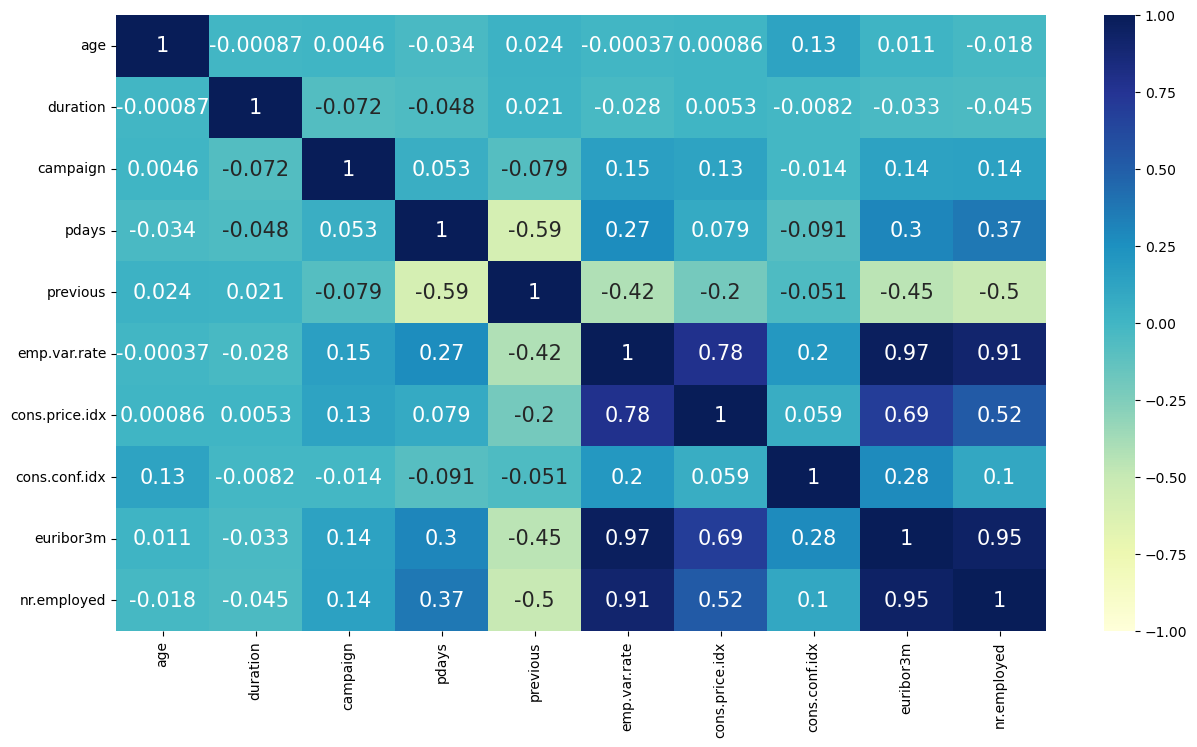

In [39]:
sns.heatmap(corrmat,cmap = "YlGnBu", vmax = 1.0,vmin=-1.0,annot = True, annot_kws = {"size":15})
plt.show()

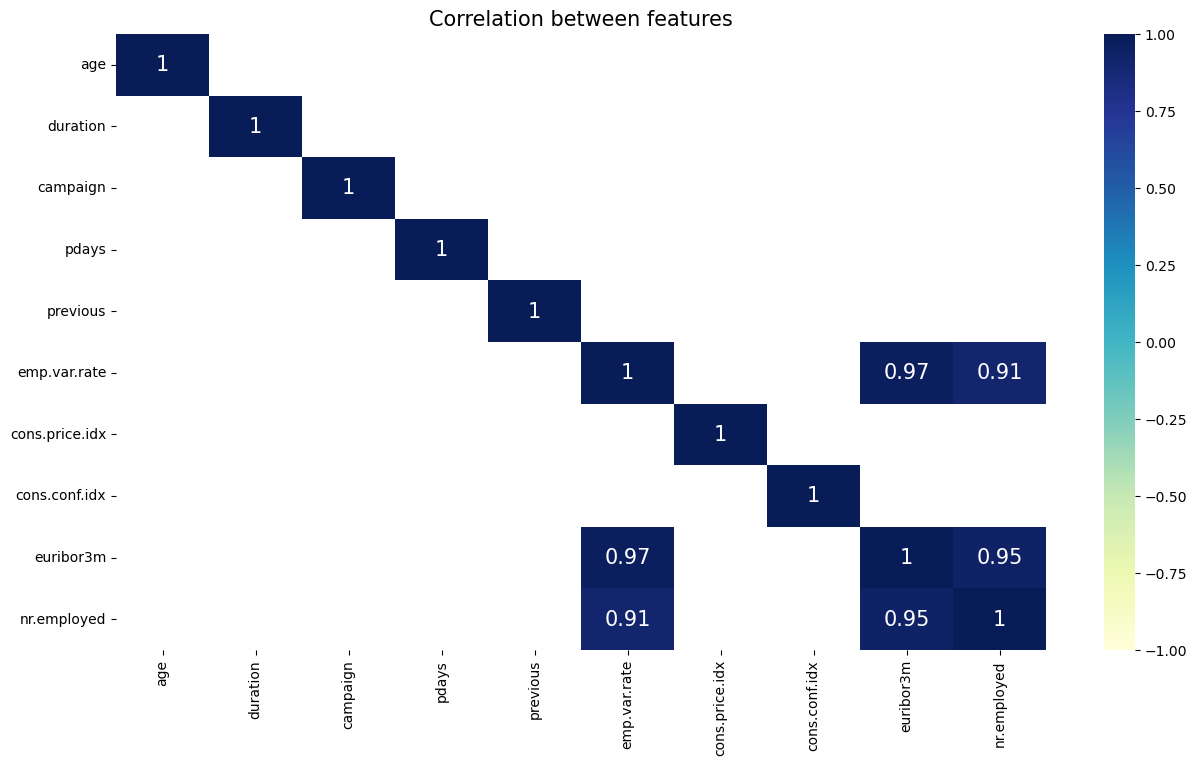

In [40]:
sns.heatmap(corrmat[(corrmat >= 0.9) | (corrmat <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

## Droping the Highly correlated data (feature Selection)

In [41]:
data = data.drop(["euribor3m","emp.var.rate","nr.employed"], axis = 1)

In [42]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

## Model Building SVM using Linear Kernal

Now we build a SVM model using linear kernal. We start with our original data set gradually proceeding with our analysis

In order to buil a SVM model using linear kernal, we do the following:
1. Split the dataset set
2. Build the model
3. Predict the values
4. Compute the accuracy measures
5. Tabulate the results

In [44]:
X = data.iloc[:,data.columns != "y"]
y = data.iloc[:,data.columns == "y"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10 )

print("X_train ",X_train.shape)

print("X_test ",X_test.shape)

print("y_train ",y_train.shape)

print("y_test ",y_test.shape)

X_train  (28831, 50)
X_test  (12357, 50)
y_train  (28831, 1)
y_test  (12357, 1)


In [49]:
svclassifier = SVC(kernel = "linear")
svclassifier.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [53]:
y_pred = svclassifier.predict(X_test)

In [55]:
result = classification_report(y_test,y_pred)

In [57]:
print(result)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10935
           1       0.57      0.37      0.45      1422

    accuracy                           0.90     12357
   macro avg       0.75      0.67      0.70     12357
weighted avg       0.88      0.90      0.89     12357



In [58]:
Kappa = metrics.cohen_kappa_score(y_test,y_pred)
print("Kappa Score :",Kappa)

Kappa Score : 0.3938140014885799


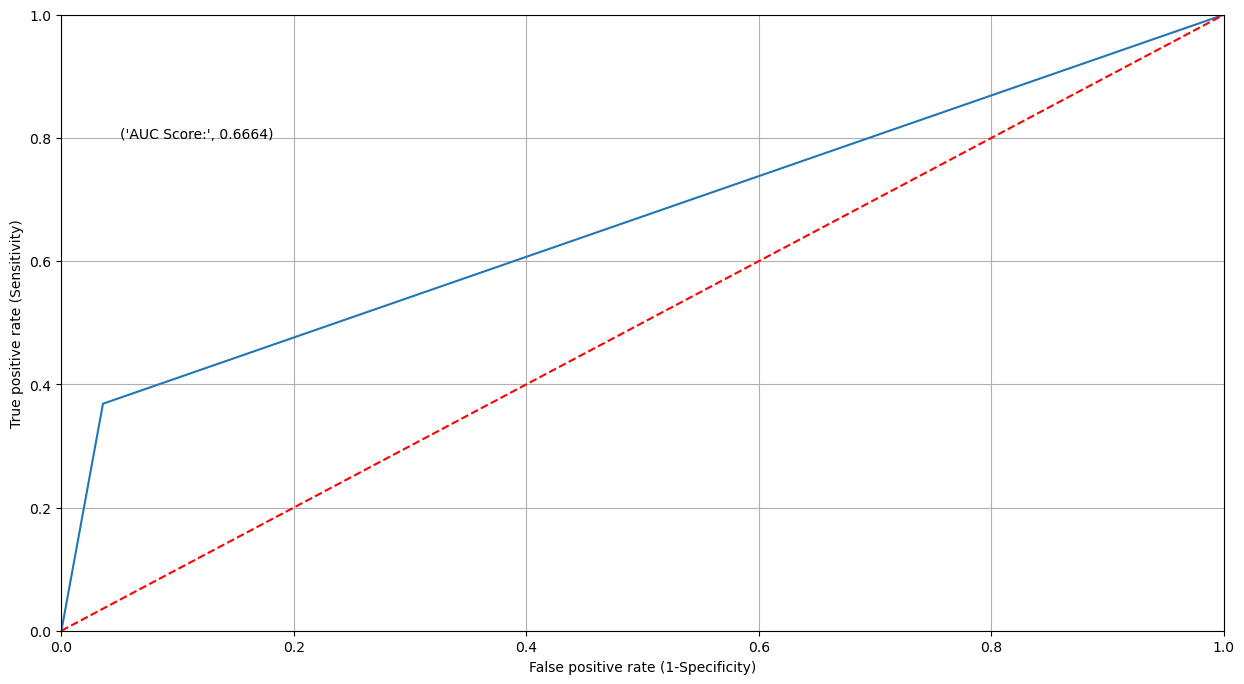

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [60]:
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score',
        'f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
SVM_linear_metrics = pd.Series({'Model': "SVM using linear kernel ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11228\4214172935.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438


## SVM With Gassian kernal

	
Now we build a SVM model using Gaussian kernal. We start with our original data set gradually proceeding with our analysis

In order to buil a SVM model using Gaussian kernal, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

In [63]:
svclassifier = SVC(kernel = "rbf")
svclassifier.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [64]:
y_pred_gaussian  = svclassifier.predict(X_test)

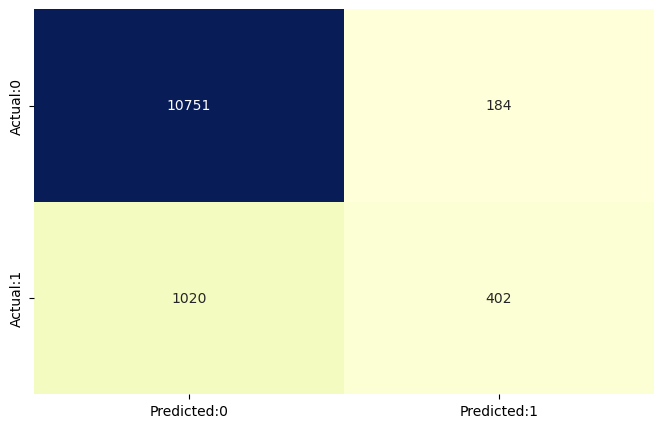

In [65]:
cm = confusion_matrix(y_test, y_pred_gaussian)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [66]:
result = classification_report(y_test, y_pred_gaussian)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10935
           1       0.69      0.28      0.40      1422

    accuracy                           0.90     12357
   macro avg       0.80      0.63      0.67     12357
weighted avg       0.89      0.90      0.88     12357



In [67]:
kappa = metrics.cohen_kappa_score(y_test, y_pred_gaussian)

# print kappa
print('kappa value:',kappa)

kappa value: 0.3572257338028345


Cohen’s kappa statistic measures interrater reliability (sometimes called interobserver agreement). Interrater reliability, or precision, happens when your data raters (or collectors) give the same score to the same data item. The kappa score can range between 0 -1, where.


0 = agreement equivalent to chance.
0.1 – 0.20 = slight agreement.
0.21 – 0.40 = fair agreement.
0.41 – 0.60 = moderate agreement.
0.61 – 0.80 = substantial agreement.
0.81 – 0.99 = near perfect agreement
1 = perfect agreement.

Therefore from the above result we can say that there is a fair interobserver agreement

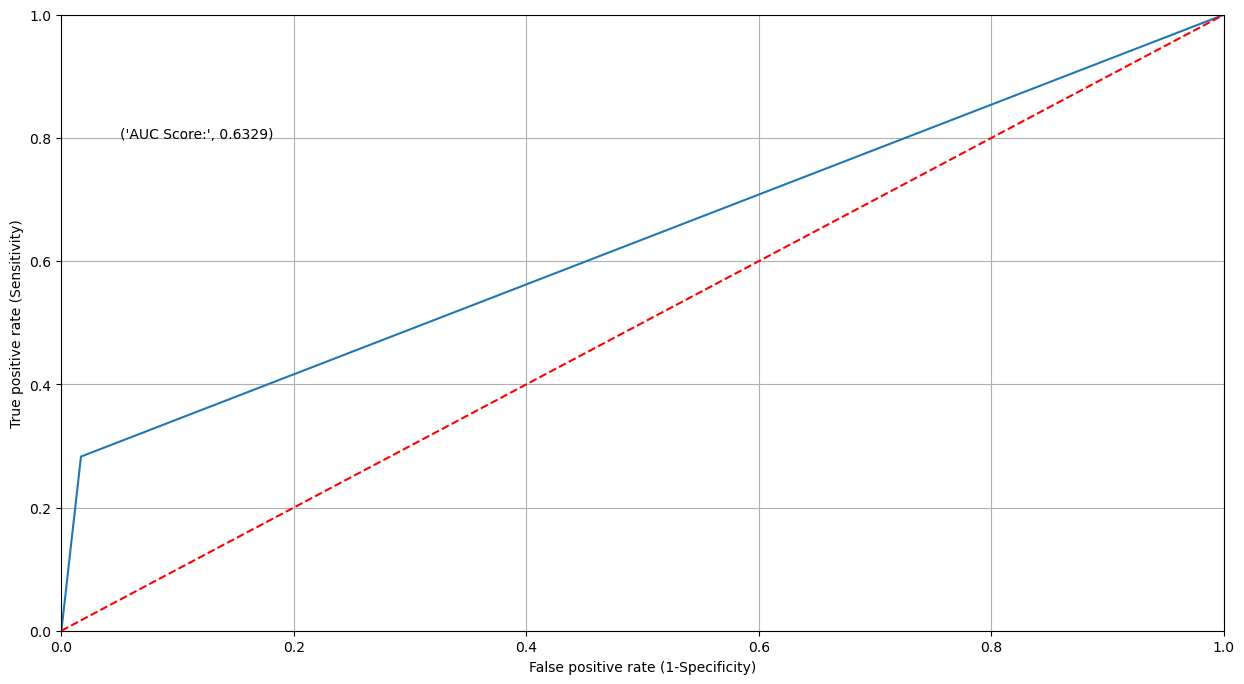

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gaussian)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_gaussian),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [69]:
SVM_Gaussian_metrics = pd.Series({'Model': "SVM using gaussian kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gaussian),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gaussian),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gaussian),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gaussian),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_gaussian),
                  'f1-score':metrics.f1_score(y_test, y_pred_gaussian)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_Gaussian_metrics , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11228\3574833242.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_Gaussian_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438
1,SVM using gaussian kernal,0.632937,0.686007,0.282700,0.902565,0.357226,0.400398


## SVM with SIgmoid kernel
	
Now we build a SVM model using Sigmoid kernal. We start with our original data set gradually proceeding with our analysis

In order to buil a SVM model using Sigmoid kernal, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

In [72]:
svclassifier = SVC(kernel = "sigmoid")
svclassifier.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [73]:
y_pred_sigmoid  = svclassifier.predict(X_test)

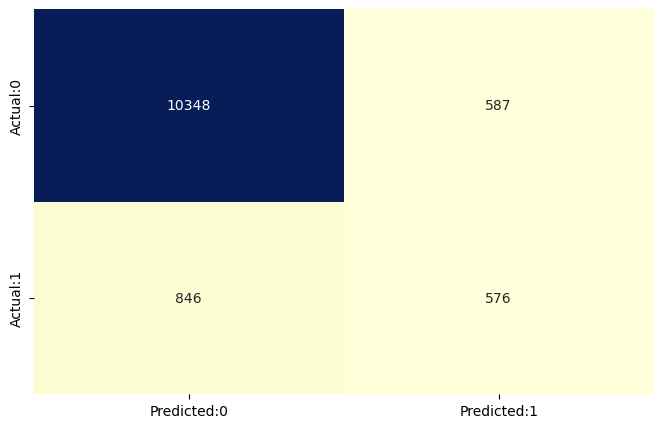

In [74]:
cm = confusion_matrix(y_test, y_pred_sigmoid)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [75]:
result = classification_report(y_test,y_pred_sigmoid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10935
           1       0.50      0.41      0.45      1422

    accuracy                           0.88     12357
   macro avg       0.71      0.68      0.69     12357
weighted avg       0.88      0.88      0.88     12357



In [76]:
kappa = metrics.cohen_kappa_score(y_test, y_pred_sigmoid)

# print kappa
print('kappa value:',kappa)

kappa value: 0.3816164769932523


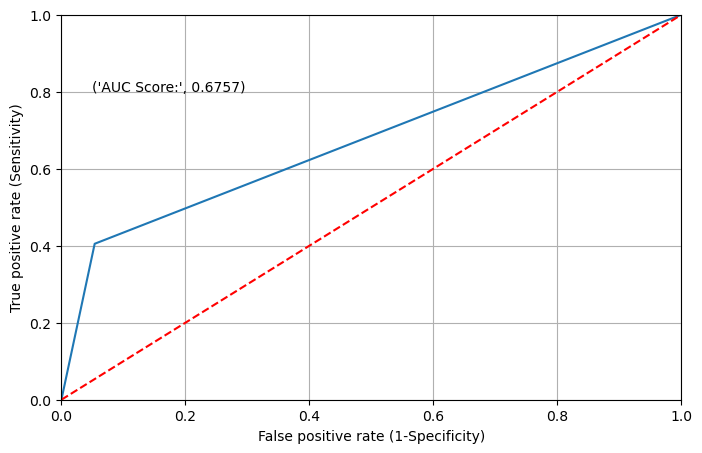

In [77]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sigmoid)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_sigmoid),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [78]:
SVM_sigmoid_metrics = pd.Series({'Model': "SVM using sigmoid kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_sigmoid),
                 'Precision Score': metrics.precision_score(y_test, y_pred_sigmoid),
                 'Recall Score': metrics.recall_score(y_test, y_pred_sigmoid),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_sigmoid),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_sigmoid),
                  'f1-score':metrics.f1_score(y_test, y_pred_sigmoid)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_sigmoid_metrics , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11228\86243437.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_sigmoid_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438
1,SVM using gaussian kernal,0.632937,0.686007,0.282700,0.902565,0.357226,0.400398
2,SVM using sigmoid kernal,0.675691,0.495271,0.405063,0.884033,0.381616,0.445648


## SVM Using Polynomial kernal
	
Now we build a SVM model using Polynomial kernal. We start with our original data set gradually proceeding with our analysis

In order to build a SVM model using Polynomial kernal, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

In [79]:
svclassifier = SVC(kernel='poly')
# fit the model
svclassifier.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [80]:
y_pred_Poly  = svclassifier.predict(X_test)

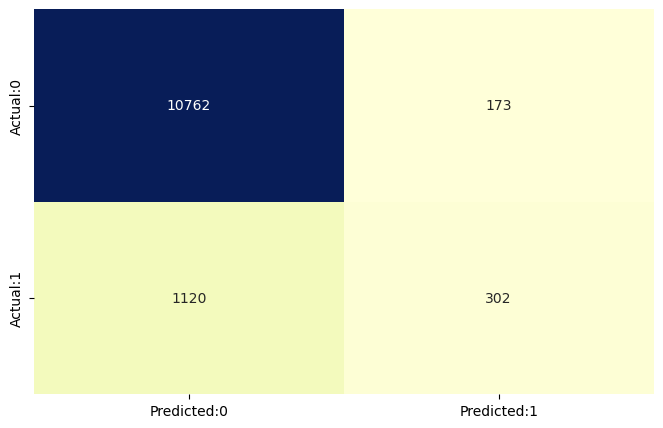

In [81]:
cm = confusion_matrix(y_test, y_pred_Poly)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [82]:
result = classification_report(y_test, y_pred_Poly)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [83]:
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly)

# print kappa
print('kappa value:',kappa)

kappa value: 0.27671511818588124


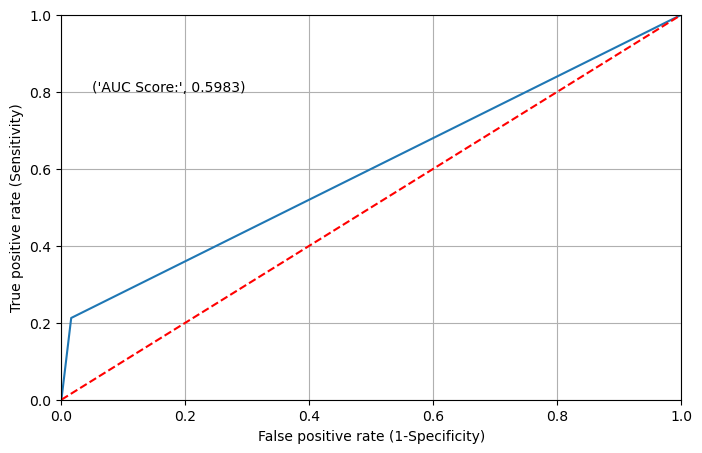

In [84]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [85]:
SVM_polynomial_metrics = pd.Series({'Model': "SVM using polynomial kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_metrics , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11228\3964512218.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_polynomial_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438
1,SVM using gaussian kernal,0.632937,0.686007,0.282700,0.902565,0.357226,0.400398
2,SVM using sigmoid kernal,0.675691,0.495271,0.405063,0.884033,0.381616,0.445648
3,SVM using polynomial kernal,0.598278,0.635789,0.212377,0.895363,0.276715,0.318397


## SVM polynomial with polynomial digree = 2 
Now we build a SVM model using Polynomial kernal, with degree=2. We start with our original data set gradually proceeding with our analysis

In order to buil a SVM model, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

In [ ]:
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')
# gamma : gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to
# exactly fit the training dataset
# fit the model
svclassifier_Poly.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_Poly_d  = svclassifier_Poly.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_Poly_d)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [ ]:
result = classification_report(y_test, y_pred_Poly_d)

# print the result
print(result)

In [ ]:
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_d)

# print kappa
print('kappa value:',kappa)

In [ ]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_d)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_d),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_d_metrics = pd.Series({'Model': "SVM using polynomial degree 2 kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_d_metrics , ignore_index = True)

# view the result table
result_tabulation

## Support Vector Machine using Polynomial Kernal using GridSearchCV
	
Now we build a SVM model using Polynomial kernal, with GridSearchCV. We start with our original data set gradually proceeding with our analysis

In order to buil a SVM model, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

In [87]:
param_grid = { 
    'degree': [2, 4], 
    'gamma' : ['auto','scale'],
    'C': [0.5, 1]


SyntaxError: unexpected EOF while parsing (4033984705.py, line 4)

In [ ]:
CV_rfc = GridSearchCV(estimator= svclassifier_Poly, param_grid=param_grid, scoring='accuracy', cv= 5)
# fit the model
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
svclassifier_Poly_Grid = SVC(kernel='poly', degree = 2, gamma = 'auto',C = 1 )
# fit the model
svclassifier_Poly_Grid.fit(X_train, y_train)

In [ ]:
y_pred_Poly_Grid  = svclassifier_Poly_Grid.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_Poly_Grid)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [ ]:
result = classification_report(y_test, y_pred_Poly_Grid)

# print the result
print(result)

In [ ]:
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_Grid)

# print kappa
print('kappa value:',kappa)

In [ ]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_Grid)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_Grid),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [ ]:
SVM_polynomial_grid_metrics = pd.Series({'Model': "SVM using polynomial kernal with GridSearch",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_grid_metrics , ignore_index = True)

# view the result table
result_tabulation